# Machine Learning Modeling for Credit Risk Prediction

___

## Introduction
As a Data Scientist at ID/X Partners, I will be involved in a project from a lending company (multifinance), where my client wants to improve the accuracy of assessing and managing credit risk, so that they can optimize their business decisions and reduce potential losses. 

My task is to develop a machine learning model that can predict credit risk based on the provided dataset, which includes approved and rejected loan data. In developing the model, I need to carry out several stages starting with Data Understanding, Exploratory Data Analysis (EDA), Data Preparation, Data Modeling, and Evaluation.

___

## Data Understanding
Import and try to understand the dataset

In [433]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import chi2
from scipy.stats import spearmanr, chi2_contingency
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [434]:
#Import dataset
raw_dt = pd.read_csv('loan_data_2007_2014.csv')

pd.set_option('display.max_columns', None)
raw_dt.sample(5)

C:\Users\user\AppData\Local\Temp\ipykernel_7328\2601520870.py:2: DtypeWarning:

Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
278604,278604,31386905,33960096,8000,8000,8000.0,36 months,11.67,264.46,B,B4,Environmental Engineer II,< 1 year,RENT,55000.0,Not Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,103xx,NY,16.12,0.0,Oct-07,1.0,NaN,NaN,11.0,0.0,5507,91.8,16.0,f,5001.23,5001.23,3956.53,3956.53,2998.77,957.76,0.0,0.0,0.0,Jan-16,264.46,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,40926.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000.0,NaN,NaN,NaN
315565,315565,25987591,28440541,16000,16000,16000.0,60 months,13.98,372.13,C,C3,unit supervisor,10+ years,MORTGAGE,58000.0,Not Verified,Aug-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,825xx,WY,10.47,0.0,Oct-96,1.0,77.0,31.0,5.0,1.0,4490,44.9,20.0,w,12754.00,12754.00,5954.08,5954.08,3246.00,2708.08,0.0,0.0,0.0,Dec-15,372.13,Jan-16,Jan-16,0.0,77.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,1475.0,144579.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,NaN,NaN,NaN
339447,339447,22471885,24794789,35000,35000,35000.0,60 months,13.98,814.03,C,C3,Chief Operating Officer,1 year,RENT,250000.0,Source Verified,Aug-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,852xx,AZ,11.09,1.0,Feb-95,0.0,12.0,NaN,18.0,0.0,46931,59.5,40.0,f,27410.46,27410.46,13838.51,13838.51,7589.54,6248.97,0.0,0.0,0.0,Jan-16,814.03,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,449303.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78900.0,NaN,NaN,NaN
447471,447471,11398749,13320933,10000,10000,10000.0,36 months,20.50,374.19,E,E1,truck loader,9 years,RENT,36000.0,Not Verified,Feb-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,150xx,PA,12.60,0.0,Sep-90,0.0,NaN,89.0,7.0,1.0,8447,52.5,11.0,f,4329.18,4329.18,8606.37,8606.37,5670.82,2935.55,0.0,0.0,0.0,Jan-16,374.19,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,8447.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16100.0,NaN,NaN,NaN
76803,76803,8044845,9766981,21850,21850,21850.0,60 months,17.10,544.21,C,C5,tech 8,10+ years,RENT,50000.0,Source Verified,Oct-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 10/11/13 > I am needing to...,debt_consolidation,helping,840xx,UT,24.89,0.0,Feb-05,0.0,NaN,NaN,9.0,0.0,6602,43.2,16.0,w,14583.92,14583.92,14149.46,14149.46,7266.08,6883.38,0.0,0.0,0.0,Jan-16,544.21,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,28049.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15300.0,NaN,NaN,NaN


In [435]:
# Copy dataset for analysis and check information for each variable (column)
df = raw_dt.copy()

# Remove any duplicate
df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

### Summary of data understanding
1. The data has 466285 rows and 75 columns.
2. The target feature for ML modeling is 'loan_status', with feature transformation needed to simplify the classes into two categories: "Low Risk" and "High Risk". Due to this, some loan data points can be dropped due to the incomplete status.
3. Based on the initial analysis, early data transformation can be performed for the 'issue_d' (the month when the loan was funded) and 'earliest_cr_line' (the month the borrower's earliest reported credit line was opened) columns. Convert 'earliest_cr_line' from "M-Y" format into the timespan (in years) between the earliest credit line recorded and the loan's issue date ('issue_d' - 'earliest_cr_line').
4. There are some non-essential columns (variables) for credit risk prediction which can be excluded.
5. There are several empty columns can be excluded for the analysis.

#### - Simplify target feature 'loan status' into 2 categories: "Low Risk" and "High Risk"

In [436]:
# Identify unique values for 'loan_status'
df['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [437]:
# Categorize 'Charged Off', 'Late (31-120 days)', 'Default', and 'Does not meet the credit policy. Status:Charged Off' as High Risk
## Categorize 'Fully Paid' and 'Does not meet the credit policy. Status:Fully Paid' as Low Risk
### Remove rows with 'Current', 'Late (16-30 days)' and 'In Grace Period' status from the dataset as it don't have final status

# Define the mapping
status = {
    'Charged Off': 'High risk',
    'Default': 'High risk',
    'Late (31-120 days)': 'High risk',
    'Does not meet the credit policy. Status:Charged Off': 'High risk',
    'Does not meet the credit policy. Status:Fully Paid': 'Low risk',
    'Fully Paid': 'Low risk'
    }

# Map the status to risk categories
df['risk_category'] = df['loan_status'].map(status)


## Values to drop
drop_v = ['Current','Late (16-30 days)','In Grace Period']

## Drop rows where 'column_name' has any of the values in `values_to_drop`
df = df[~df['loan_status'].isin(drop_v)]
df['risk_category'].value_counts()
                                                        

risk_category
Low risk     186727
High risk     50968
Name: count, dtype: int64

#### - Do early data transformation for 'earliest_cr_line' column

In [438]:
# Modify 'earliest_cr_line' column into the timespan between the earliest credit line recorded and issue date of the loan ('issue_d' - 'earliest_cr_line')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

df['earliest_cr_line'] = (df['issue_d'].dt.year - df['earliest_cr_line'].dt.year) + \
                        (df['issue_d'].dt.month - df['earliest_cr_line'].dt.month) / 12.0
df['earliest_cr_line'] = df['earliest_cr_line'].round(1)

In [439]:
## Mistransformation happened. e.g. for 'earliest_cr_line' = "Sep-62", the data transformed into 2062-09-01, which is supposed to be 1962-09-01
## Hence, the transformed variable has negative value, which is not possible
df['earliest_cr_line'][1580]

-50.8

In [440]:
### Solve this problem by adding 100 to each negative value to get the true value
### Set the condition
condition = df['earliest_cr_line'] < 0

### Apply the change
df.loc[condition, 'earliest_cr_line'] = df.loc[condition, 'earliest_cr_line']+100

### Check if there is any negative value for the 'earliest_cr_line'
df[df['earliest_cr_line']<0]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk_category


The 'earliest_cr_line' has been converted. Now, we can remove non-essential columns for credit risk prediction

#### - Remove non-essential columns for credit risk prediction

In [441]:
# Remove non-essential or unusable columns (variables) for credit risk prediction

## Drop non-essential columns or columns where data is only available after the loan is approved
drop_cols = ['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'grade', 
             'sub_grade', 'emp_title', 'issue_d','loan_status', 'pymnt_plan', 'url', 'desc', 'title', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 
             'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
             'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'policy_code']

df = df.drop(columns=drop_cols)

Non-essential variables has been excluded. Now drop any empty column.

#### - Drop empty columns

In [442]:
# Drop empty columns
df = df.dropna(axis=1, how='all')

# Check current dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237695 entries, 0 to 466283
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   term                         237695 non-null  object 
 1   emp_length                   228539 non-null  object 
 2   home_ownership               237695 non-null  object 
 3   annual_inc                   237691 non-null  float64
 4   verification_status          237695 non-null  object 
 5   purpose                      237695 non-null  object 
 6   zip_code                     237695 non-null  object 
 7   addr_state                   237695 non-null  object 
 8   dti                          237695 non-null  float64
 9   delinq_2yrs                  237666 non-null  float64
 10  earliest_cr_line             237666 non-null  float64
 11  inq_last_6mths               237666 non-null  float64
 12  mths_since_last_delinq       104703 non-null  float64
 13  mths

In [443]:
print(f'Number of Rows = {df.shape[0]}')
print(f'Number of Columns = {df.shape[1]}')

Number of Rows = 237695
Number of Columns = 28


The data now has 237695 rows and 28 columns. The non-essential columns have been excluded for further data analysis.

## Exploratory Data Analysis (EDA)

### Handling missing values

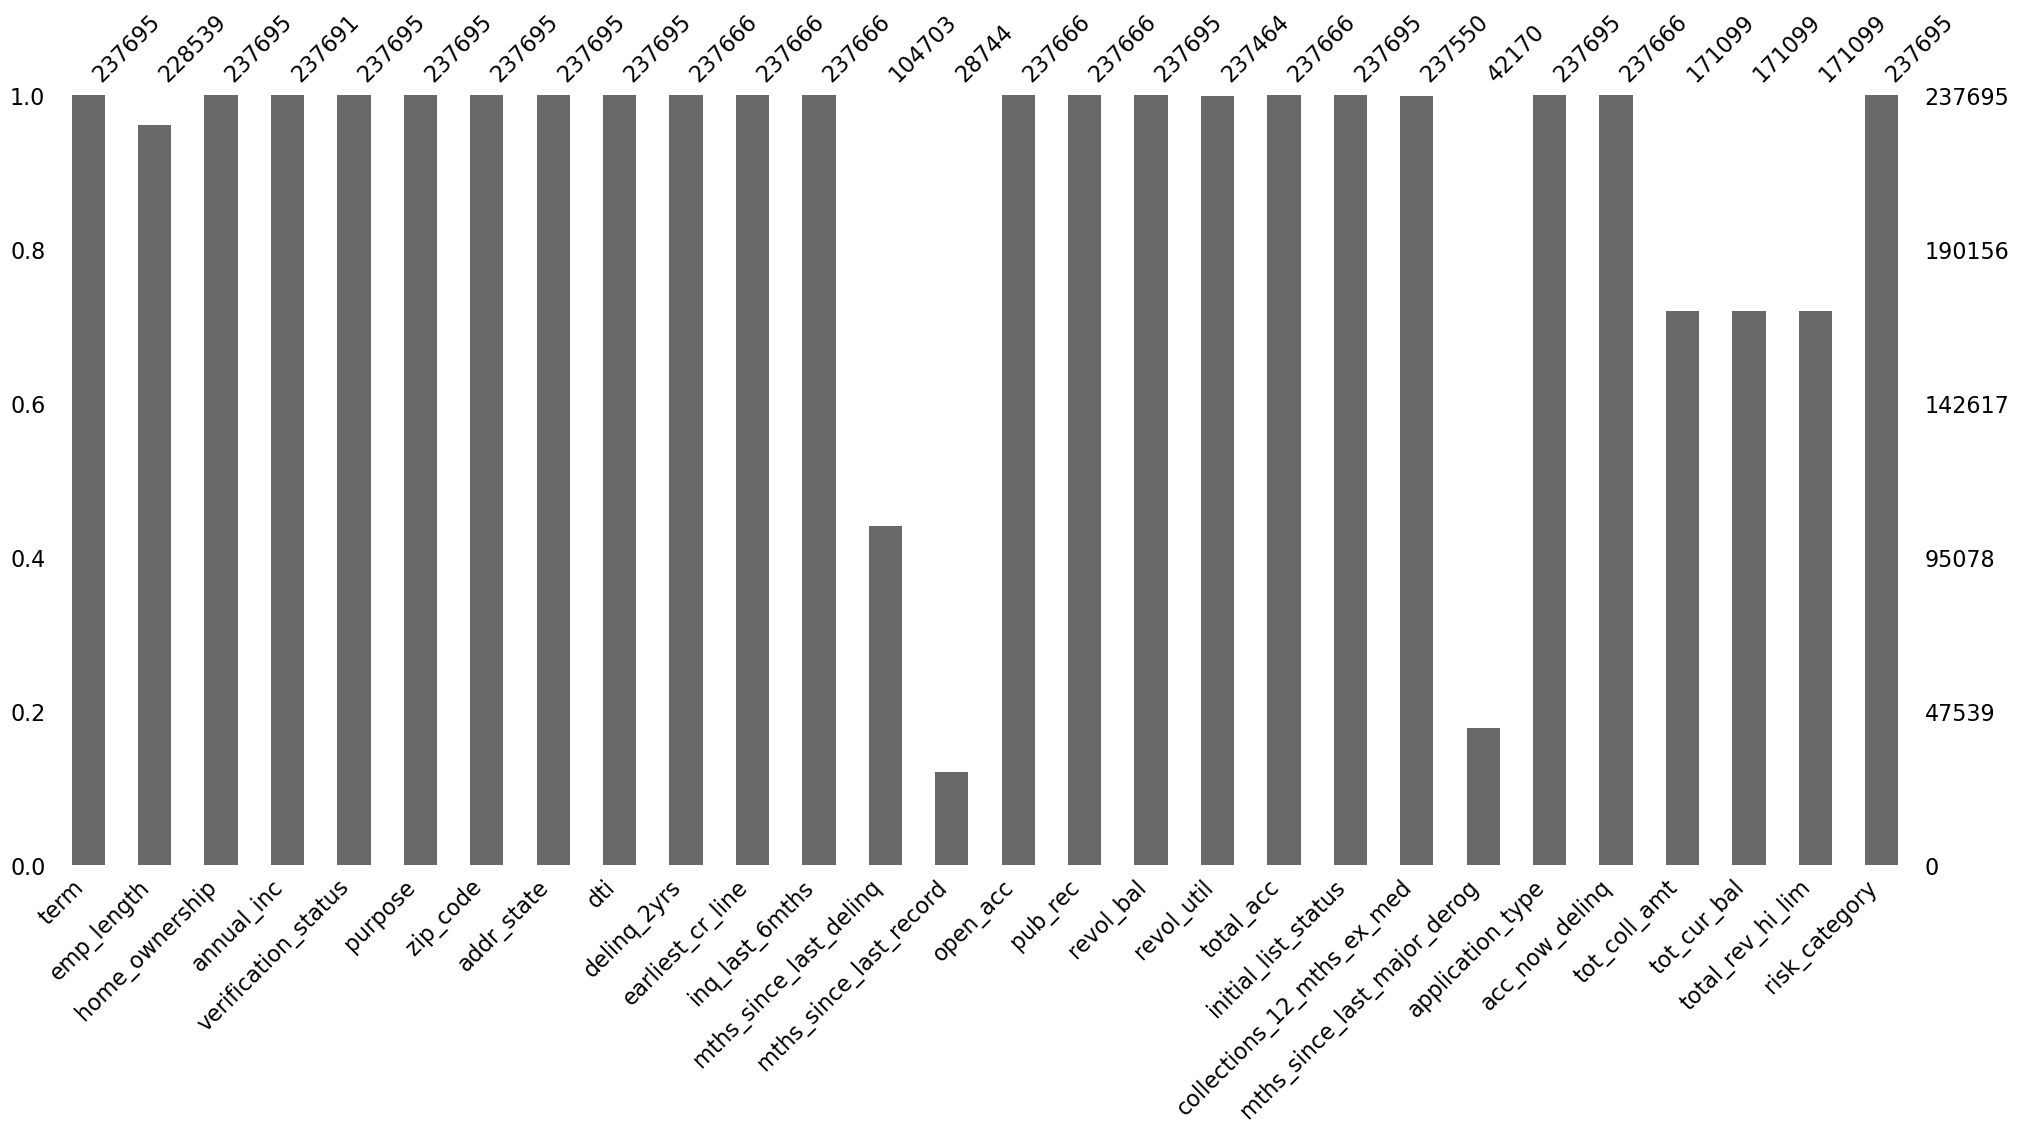

In [444]:
# Missing value bar chart
msno.bar(df)
plt.show()

**List of features with noticable number of missing values:**
- % of missing values >50% : 'mths_since_last_delinq', 'mths_since_last_record', and 'mths_since_last_major_derog'
- % of missing values >20% and <50% : 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'
- % of missing values >3% and <20% : 'emp_length'

Drop 'mths_since_last_delinq', 'mths_since_last_record', and 'mths_since_last_major_derog' with lots of null values.

In [445]:
# Create new dataframe for cleaned dataset
df_cleaned = df.copy()

# Drop 'mths_since_last_delinq', 'mths_since_last_record', and 'mths_since_last_major_derog'
df_cleaned = df_cleaned.drop(columns=['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog'])

Remove rows with null values

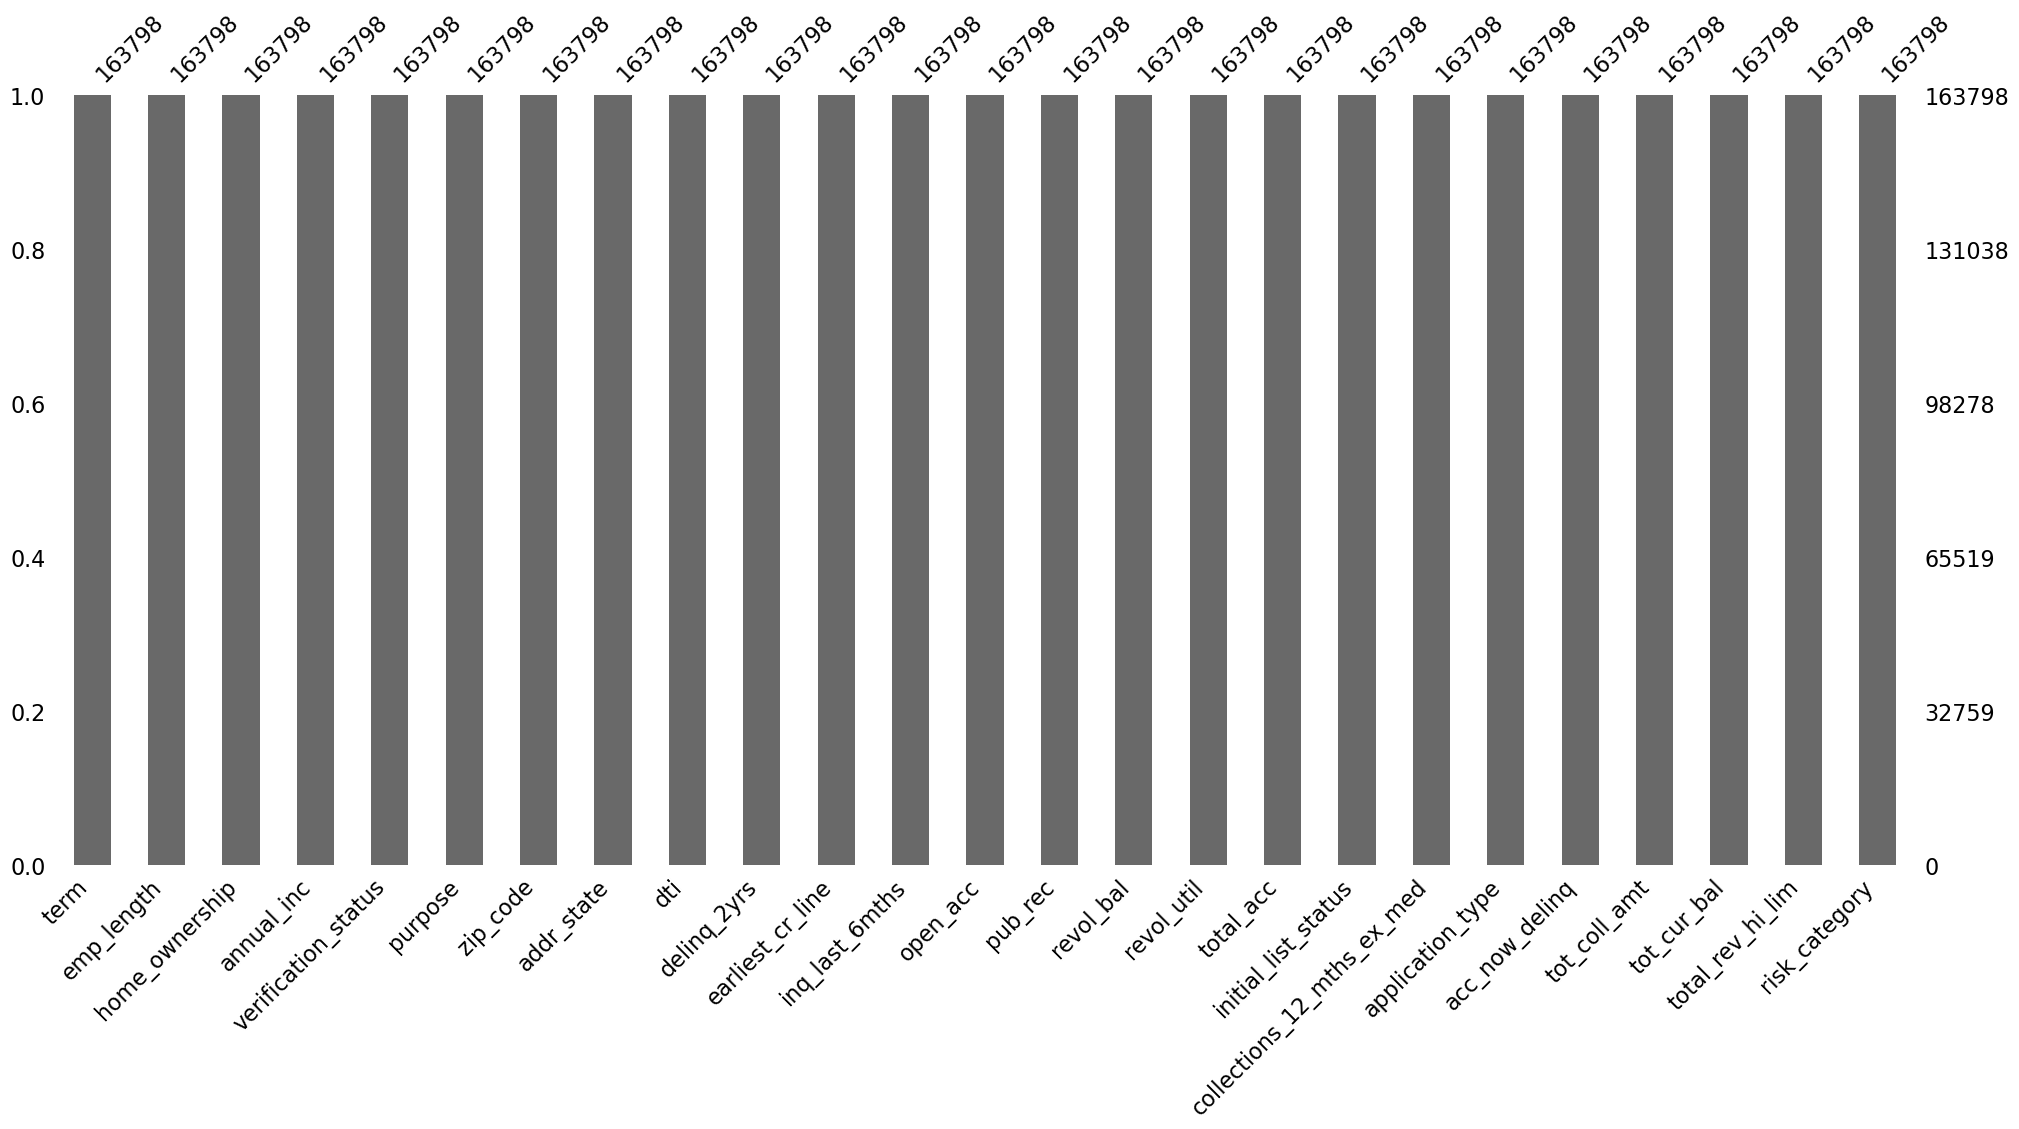

In [446]:
df_cleaned = df_cleaned.dropna()

msno.bar(df_cleaned)
plt.show()

Now the data considered clean

### Distribution of the Target Variable

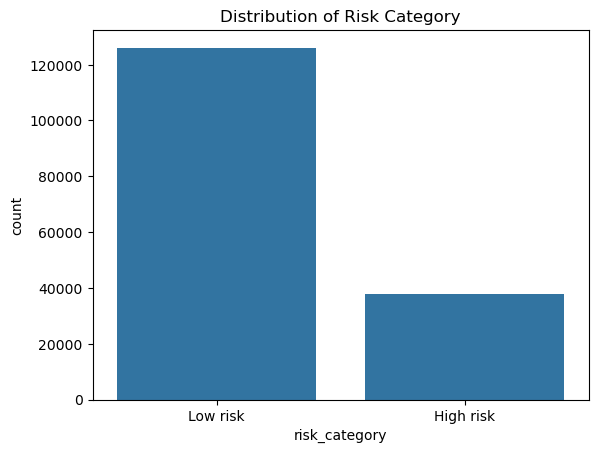

In [447]:
sns.countplot(data=df_cleaned, x='risk_category')
plt.title('Distribution of Risk Category')
plt.show()

In [448]:
df_cleaned['risk_category'].value_counts()

risk_category
Low risk     126115
High risk     37683
Name: count, dtype: int64

Dataset shows 3x higher number of past loan considered as "low risk" compared to the "high risk". The dataset can be considered mildly imbalance. Consider data balancing for the training sets.

### Numerical Features - Statistics

In [449]:
numerical_features = ['annual_inc', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
                      'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 
                      'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 
                      'tot_cur_bal', 'total_rev_hi_lim']

## Show stats for numerical data
df_cleaned[numerical_features].describe()

,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,1.637980e+05,163798.000000,163798.000000,163798.000000,163798.000000,163798.000000,163798.000000,1.637980e+05,163798.000000,163798.000000,163798.000000,163798.000000,1.637980e+05,1.637980e+05,1.637980e+05
mean,7.430448e+04,17.221110,0.286047,15.450017,0.878136,11.352697,0.163048,1.573620e+04,56.239251,25.804851,0.007967,0.003987,1.997183e+02,1.383842e+05,2.924803e+04
std,5.489254e+04,7.753506,0.798944,6.791752,1.088462,4.886646,0.464983,1.930082e+04,23.421595,11.649030,0.095587,0.068848,2.267203e+04,1.510897e+05,2.858647e+04
min,6.000000e+03,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+02
25%,4.660200e+04,11.400000,0.000000,10.900000,0.000000,8.000000,0.000000,6.465000e+03,39.500000,17.000000,0.000000,0.000000,0.000000e+00,2.876825e+04,1.330000e+04
50%,6.500000e+04,16.850000,0.000000,14.200000,1.000000,11.000000,0.000000,1.153500e+04,57.500000,24.000000,0.000000,0.000000,0.000000e+00,8.171250e+04,2.220000e+04
75%,9.000000e+04,22.800000,0.000000,18.800000,1.000000,14.000000,0.000000,1.971900e+04,74.500000,33.000000,0.000000,0.000000,0.000000e+00,2.087950e+05,3.640000e+04
max,7.141778e+06,39.990000,29.000000,66.100000,7.000000,76.000000,10.000000,1.746716e+06,892.300000,150.000000,5.000000,5.000000,9.152545e+06,8.000078e+06,2.013133e+06


### Numerical Features - Distribution Plots

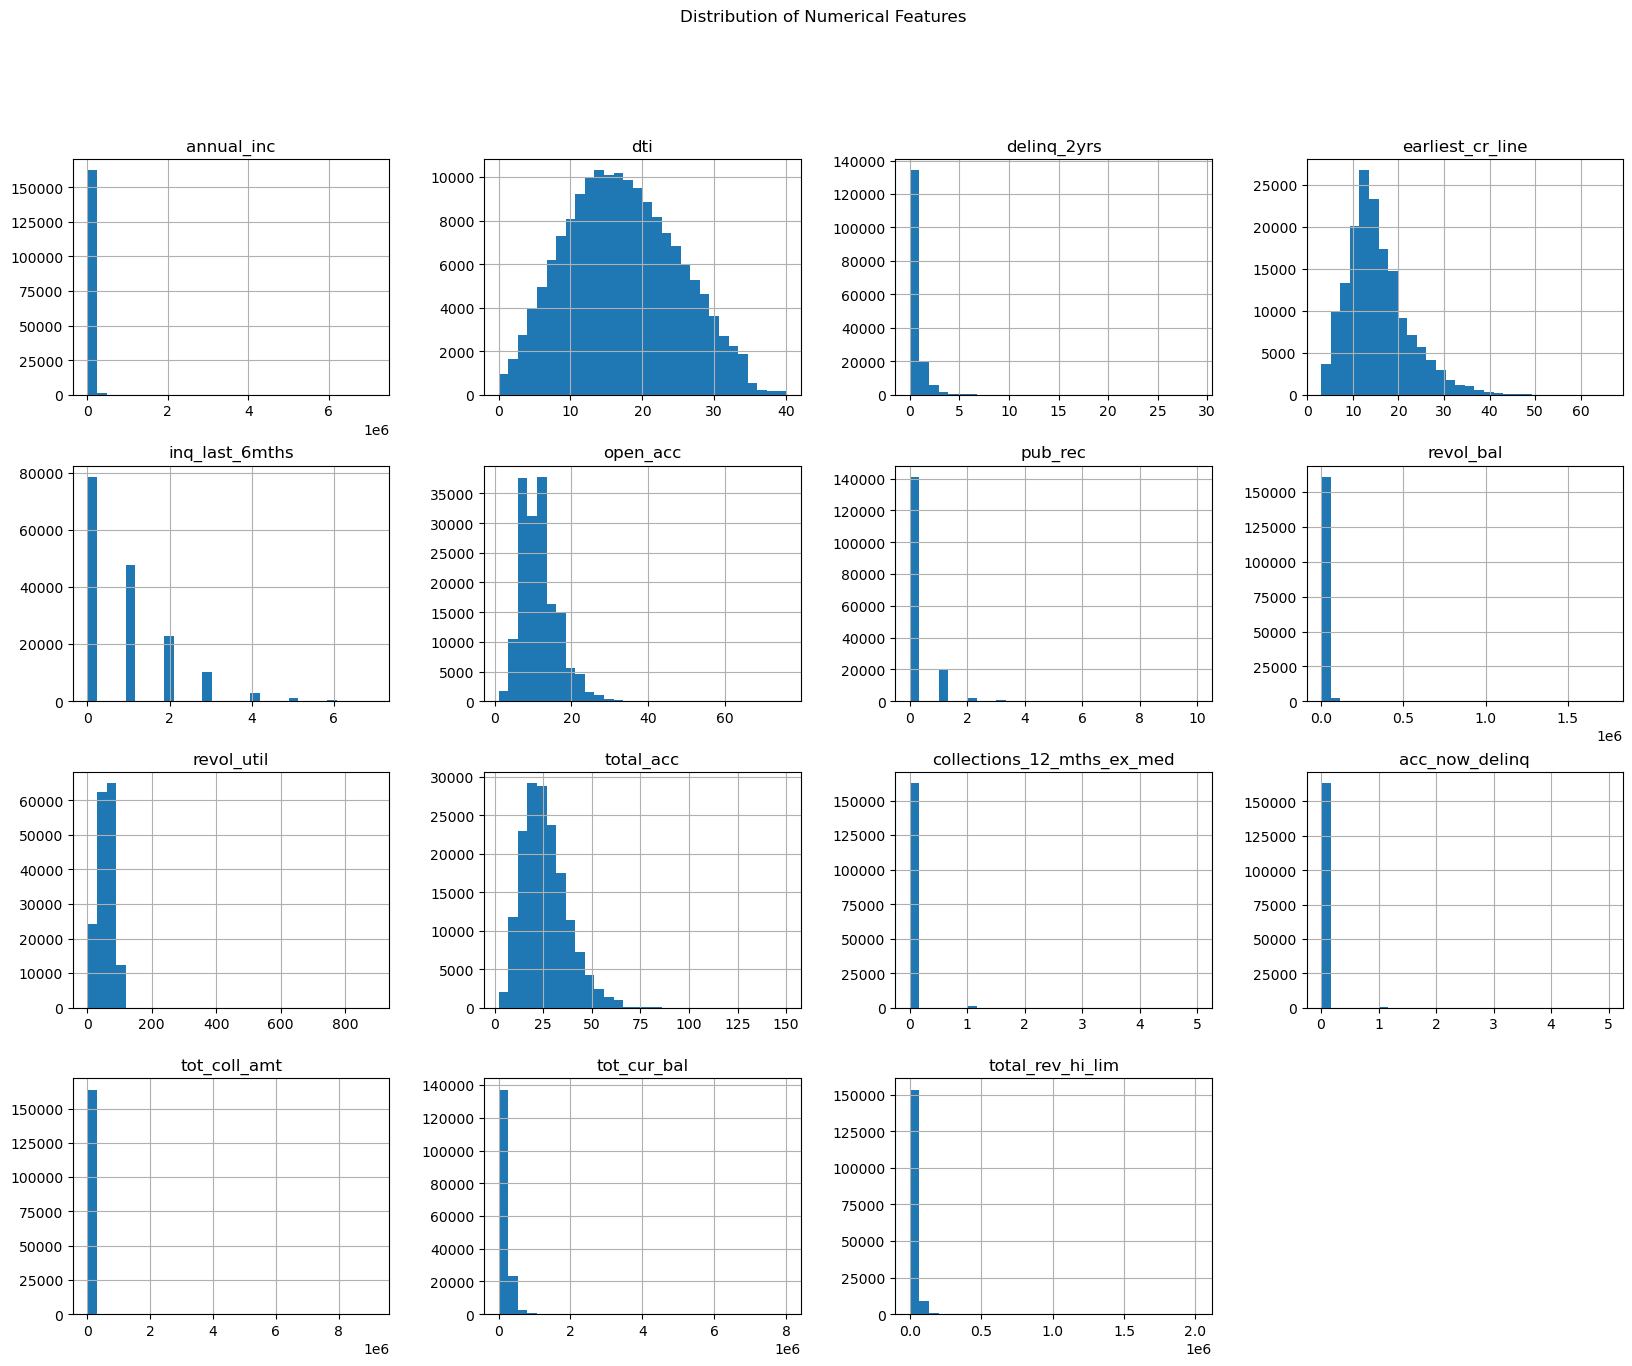

In [450]:
df_cleaned[numerical_features].hist(bins=30, figsize=(20, 15))
plt.suptitle('Distribution of Numerical Features')
plt.show()

Most of the features are positively skewed, except for 'dti' which is relatively normal. Consider normalizeing the skewed features for ML modeling.

### Numerical Features Correlation Analysis

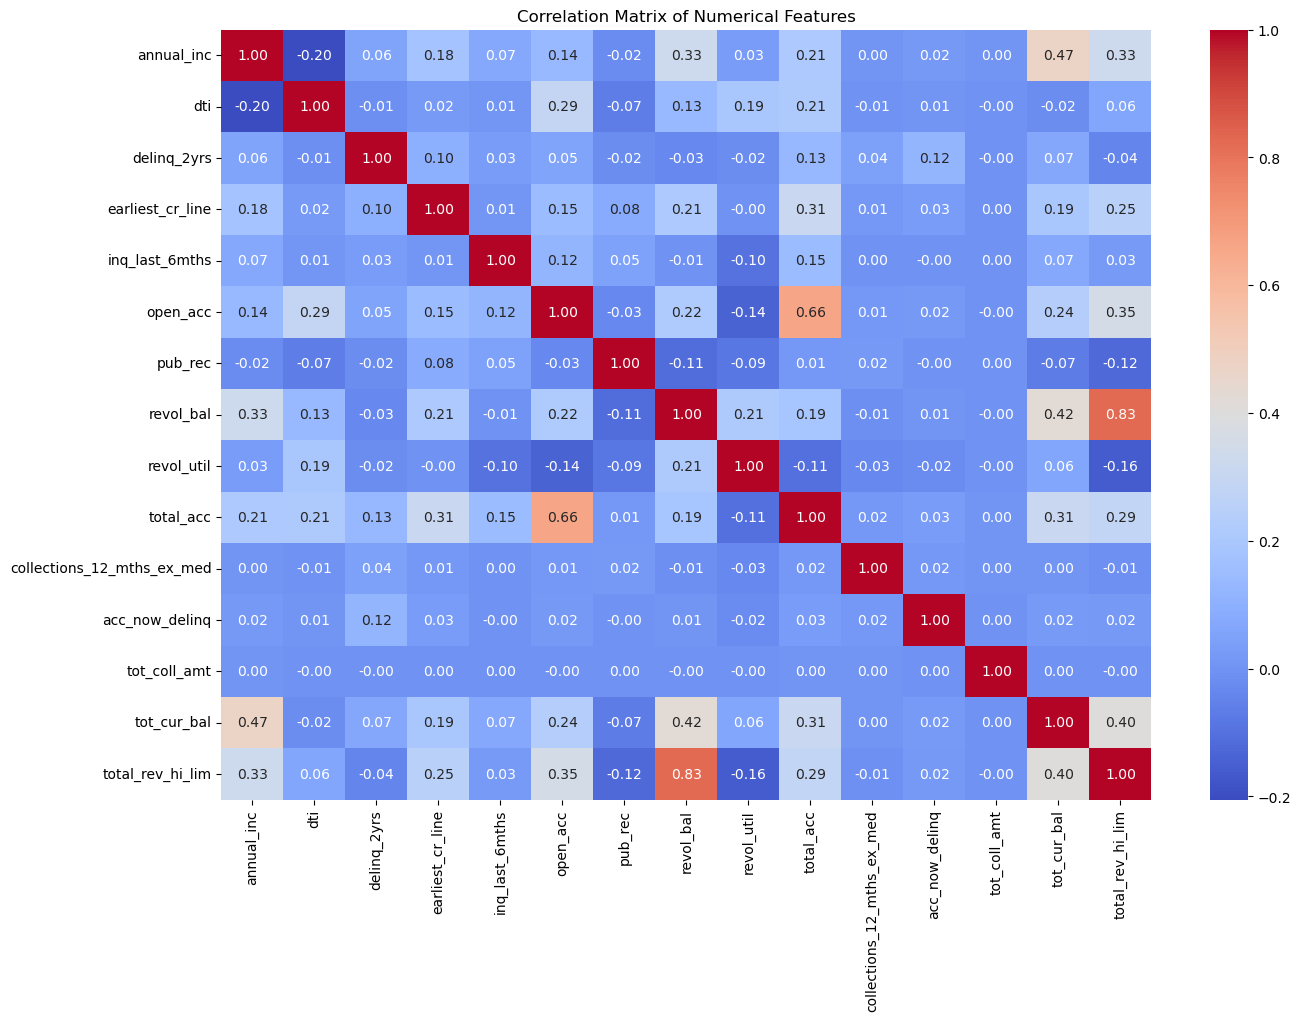

In [451]:
corr_matrix = df_cleaned[numerical_features].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

There are 2 couple of features with noticable high linear correlation:
- 'total_acc' and 'open_acc'
- 'total_rev_hi_lim' and 'revol_bal'

Features can be dropped to reduce the number of input features. Consider using ANOVA test to drop feature with lowest correlation with the target.

### Numerical Features Correlation with Target (Using ANOVA)

In [452]:
X = df_cleaned[numerical_features] # Numerical input features
y = df_cleaned['risk_category'] # Target (Categorical)

# Compute ANOVA F-values and p-values
f_values, p_values = f_classif(X, y)

anova_df = pd.DataFrame({
    'Feature': X.columns,
    'F-value': f_values,
    'p-value': p_values.round(2)
})

# Sort the DataFrame by F-value in descending order
sorted_anova_df = anova_df.sort_values(by='F-value', ascending=False)
sorted_anova_df

,Feature,F-value,p-value
1,dti,2867.168623,0.00
8,revol_util,1320.496743,0.00
13,tot_cur_bal,924.263057,0.00
0,annual_inc,780.319860,0.00
14,total_rev_hi_lim,463.907590,0.00
4,inq_last_6mths,353.107054,0.00
9,total_acc,213.591034,0.00
3,earliest_cr_line,190.555863,0.00
2,delinq_2yrs,91.990281,0.00
5,open_acc,86.722249,0.00


Using ANOVA test, the table shows the correlation between the numerical input features and the categorical target. The table sorted the features from the highest correlated feature to the lowest.

#### Drop-and-keep-1 highly correlated features

There are 2 couple of features with noticable high linear correlation:
- 'total_acc' and 'open_acc'
- 'total_rev_hi_lim' and 'revol_bal'

Features can be dropped to reduce the number of input features. Based on the result of the previous ANOVA test, the 'open_acc' and 'revol_bal' will be dropped.

In [453]:
df_cleaned = df_cleaned.drop(columns=['open_acc','revol_bal'])
df_cleaned.columns

Index(['term', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'pub_rec',
       'revol_util', 'total_acc', 'initial_list_status',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'risk_category'],
      dtype='object')

In [454]:
numerical_features = ['annual_inc', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
                      'pub_rec', 'revol_util', 'total_acc', 
                      'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 
                      'tot_cur_bal', 'total_rev_hi_lim']

### Categorical Features - Statistics

In [455]:
categorical_features = ['term', 'emp_length', 'home_ownership', 'verification_status', 'zip_code', 'purpose', 'addr_state', 'initial_list_status', 'application_type']

In [456]:
## Show stats for categorical data
df_cleaned[categorical_features].describe()

,term,emp_length,home_ownership,verification_status,zip_code,purpose,addr_state,initial_list_status,application_type
count,163798,163798,163798,163798,163798,163798,163798,163798,163798
unique,2,11,6,3,852,13,49,2,1
top,36 months,10+ years,MORTGAGE,Verified,945xx,debt_consolidation,CA,f,INDIVIDUAL
freq,125347,55245,84099,61449,2090,101205,27491,105682,163798


**Features to be removed:**
- 'zip_code' as it has high cardinality
- 'application_type' as it only has 1 category

In [457]:
# Drop 'zip_code' and 'application_type' from dataset
df_cleaned = df_cleaned.drop(columns=['zip_code','application_type'])

# New categorical features
categorical_features = ['term', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status']

### Categorical Features Relation with Target (Using Chi-square)

Use Chi-Square test method to calculate the significance between the categorical input features and the target (categorical)

Do feature encoding for current categorical features

#### Feature Encoding for Target

In [458]:
# Feature encoding for target
df_cleaned['risk_category'] = df_cleaned['risk_category'].map({'High risk': 1, 'Low risk': 0})
df_cleaned['risk_category'].unique()

array([0, 1], dtype=int64)

#### Feature Encoding for Nominal Data

In [459]:
# Feature encoding for nominal data
nom_cat = ['home_ownership', 'purpose', 'addr_state', 'initial_list_status']

le = LabelEncoder()

for feature in nom_cat:
    df_cleaned[feature] = le.fit_transform(df_cleaned[feature])

df_cleaned[nom_cat].sample(5)

,home_ownership,purpose,addr_state,initial_list_status
175943,5,2,32,0
307456,4,3,13,0
430361,5,2,14,1
192911,1,2,33,0
124089,5,2,31,0


#### Feature Encoding for Ordinal Data

In [460]:
## Feature encoding for ordinal data

## Ordinal mappings
mappings = {
    'term': {' 36 months': 0, ' 60 months': 1},
    'emp_length': {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10},
    'verification_status': {'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}
}

## Apply the mapping for each feature
for feature, mapping in mappings.items():
    df_cleaned[feature] = df_cleaned[feature].map(mapping)

df_cleaned['emp_length'].unique().tolist()

[10, 5, 2, 4, 9, 0, 8, 1, 3, 7, 6]

#### Chi-square Analysis

In [461]:
X = df_cleaned[categorical_features] # Numerical input features
y = df_cleaned['risk_category'] # Target (Categorical)

# Perform Chi-square test
chi2_values, p_values = chi2(X, y)

# Create a DataFrame for the results
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Value': chi2_values,
    'p-value': p_values.round(2)
})

# Sort by Chi2 Value
chi2_results = chi2_results.sort_values(by='Chi2 Value', ascending=False)
chi2_results

,Feature,Chi2 Value,p-value
0,term,3644.293757,0.00
2,home_ownership,931.992744,0.00
3,verification_status,488.562224,0.00
4,purpose,347.700847,0.00
5,addr_state,163.246958,0.00
1,emp_length,59.805382,0.00
6,initial_list_status,6.819956,0.01


Using Chi-Square test, the table shows the correlation between the categorical input features and the categorical target. The table sorted the features from the highest correlated feature to the lowest.

Now check features correlation between categorical input features for the possibility of dropping highly correlated features.

In [462]:
# Check Spearman's correlation between ordinal data

ord_cat = ['term', 'emp_length', 'verification_status'] # Ordinal data

# Compute Spearman's correlation matrix
corr_matrix, _ = spearmanr(df_cleaned[ord_cat], axis=0)

# Convert the result to a DataFrame for better readability
corr_df = pd.DataFrame(corr_matrix, index=df_cleaned[ord_cat].columns, columns=df_cleaned[ord_cat].columns)
corr_df

,term,emp_length,verification_status
term,1.000000,0.069811,0.28302
emp_length,0.069811,1.000000,0.07174
verification_status,0.283020,0.071740,1.00000


No highly correlated features for ordinal data

Now check nominal data

In [463]:
# Define function to compute Cramer's V
def cramers_v(x, y):
    crosstab = pd.crosstab(x, y)
    chi2_stat, _, _, _ = chi2_contingency(crosstab, correction=False)
    n = crosstab.sum().sum()
    k = min(crosstab.shape) - 1
    return np.sqrt(chi2_stat / (n * k))

# Compute Cramer's V for each pair of features
features = df_cleaned[nom_cat].columns
cramers_v_matrix = pd.DataFrame(index=features, columns=features)

for i in range(len(features)):
    for j in range(len(features)):
        if i <= j:
            cramers_v_matrix.iloc[i, j] = cramers_v(df[features[i]], df[features[j]])
        else:
            cramers_v_matrix.iloc[i, j] = cramers_v_matrix.iloc[j, i]

cramers_v_matrix

,home_ownership,purpose,addr_state,initial_list_status
home_ownership,1.0,0.087795,0.118841,0.039219
purpose,0.087795,1.0,0.028363,0.098666
addr_state,0.118841,0.028363,1.0,0.053348
initial_list_status,0.039219,0.098666,0.053348,1.0


No highly correlated features for nominal data, then no other categorical features dropped.

### Categorical Features - Count Plots

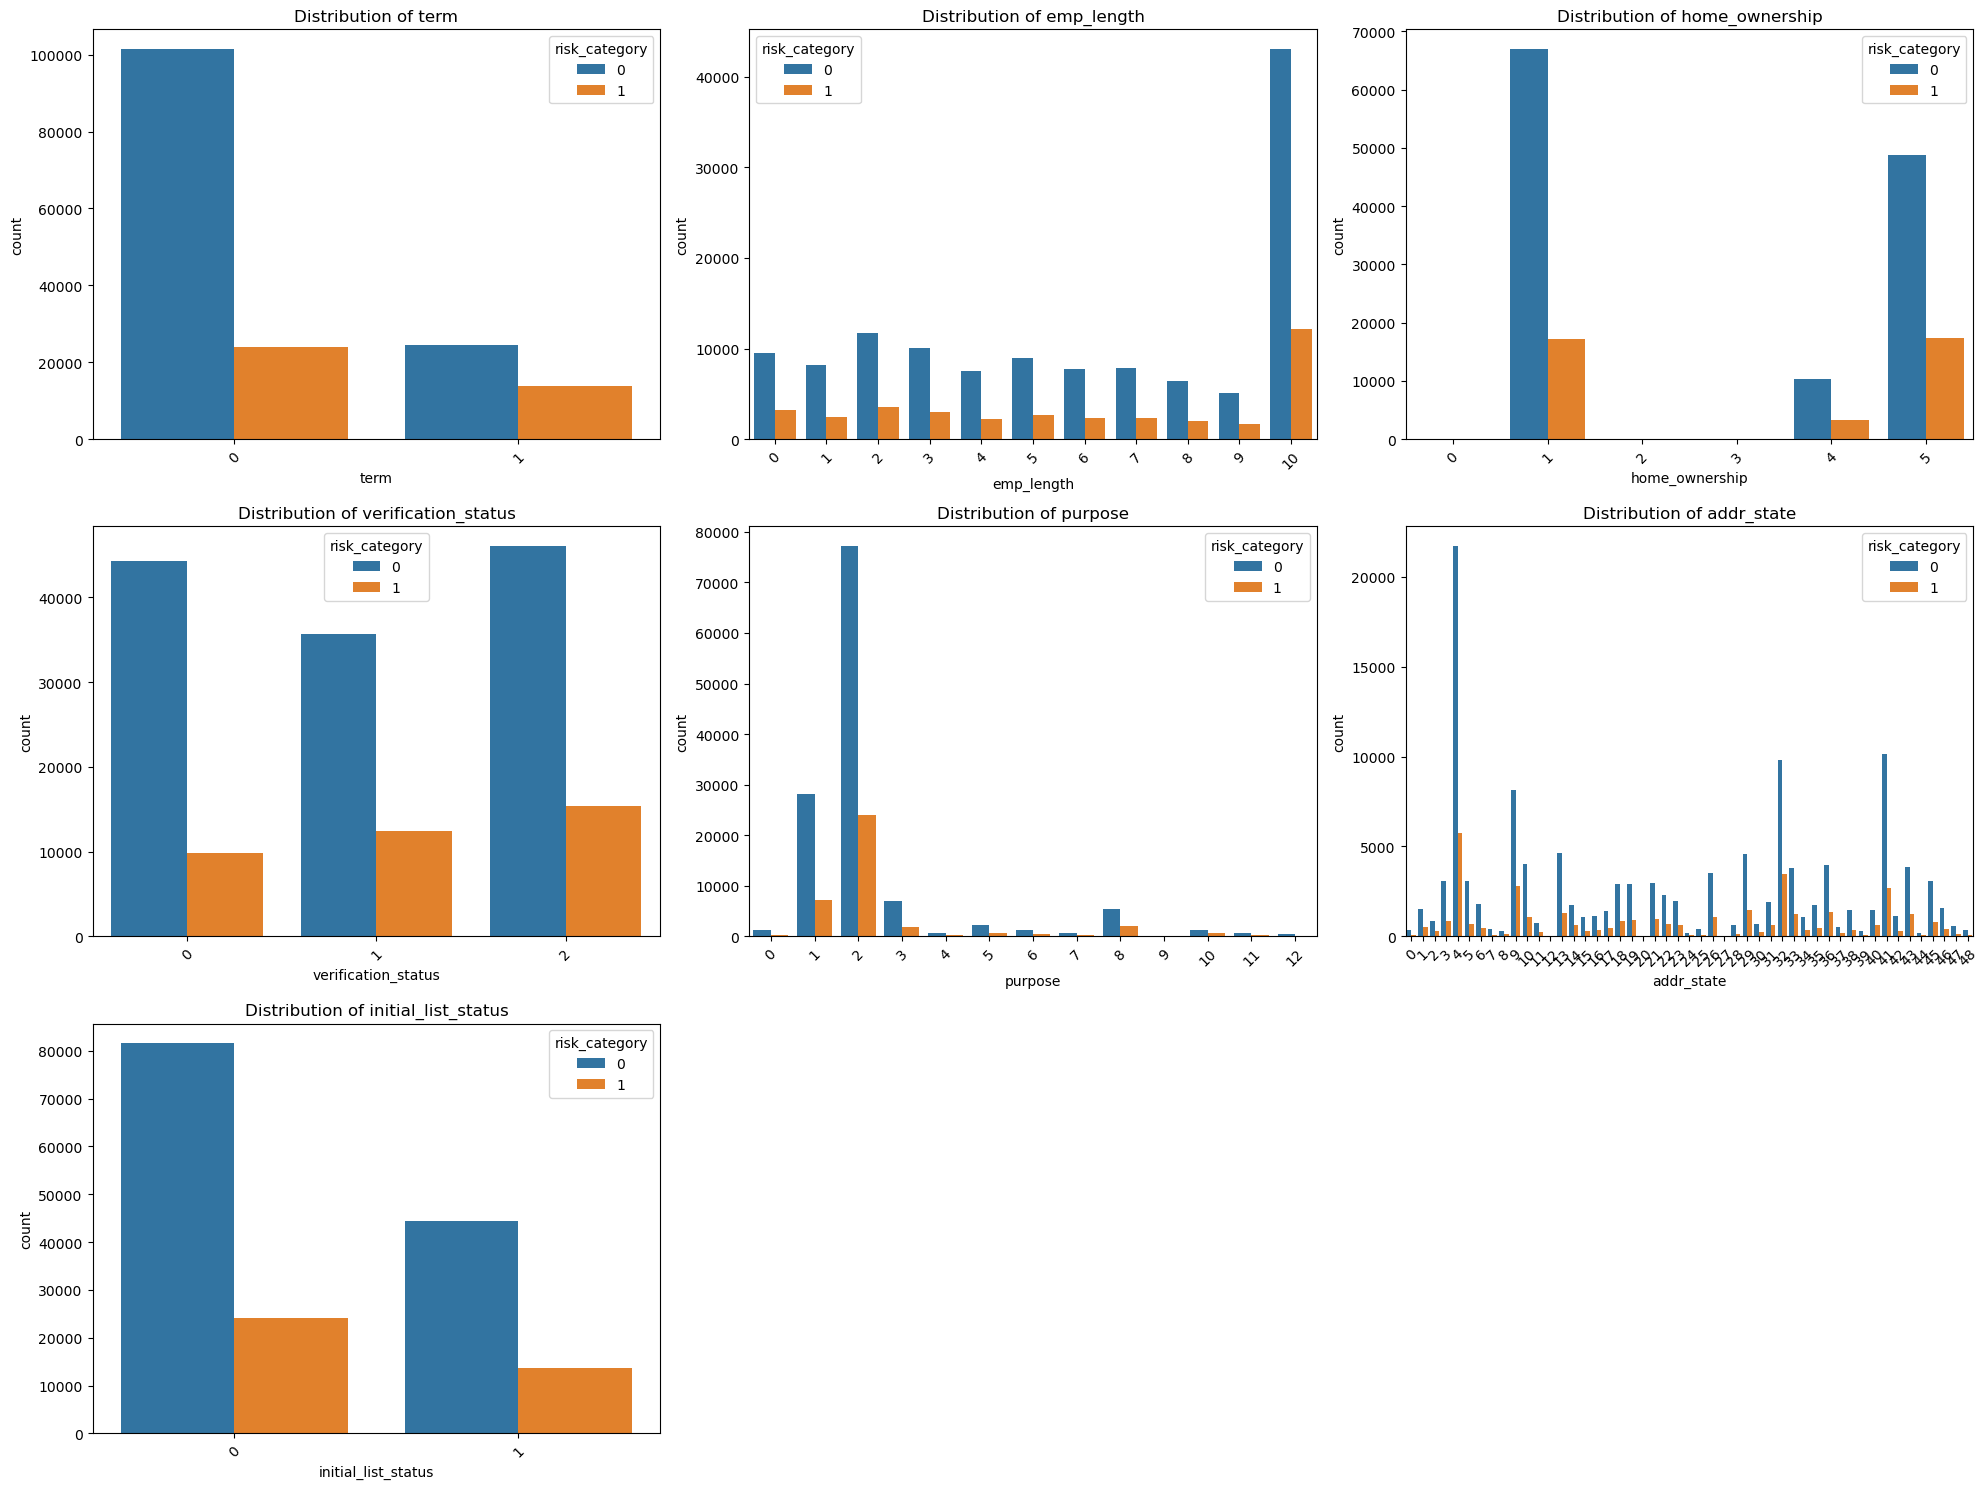

In [464]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df_cleaned, x=col, hue='risk_category')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Loan with 36 months term has lower ratio of high risk loan

### Boxplots to Check for Outliers

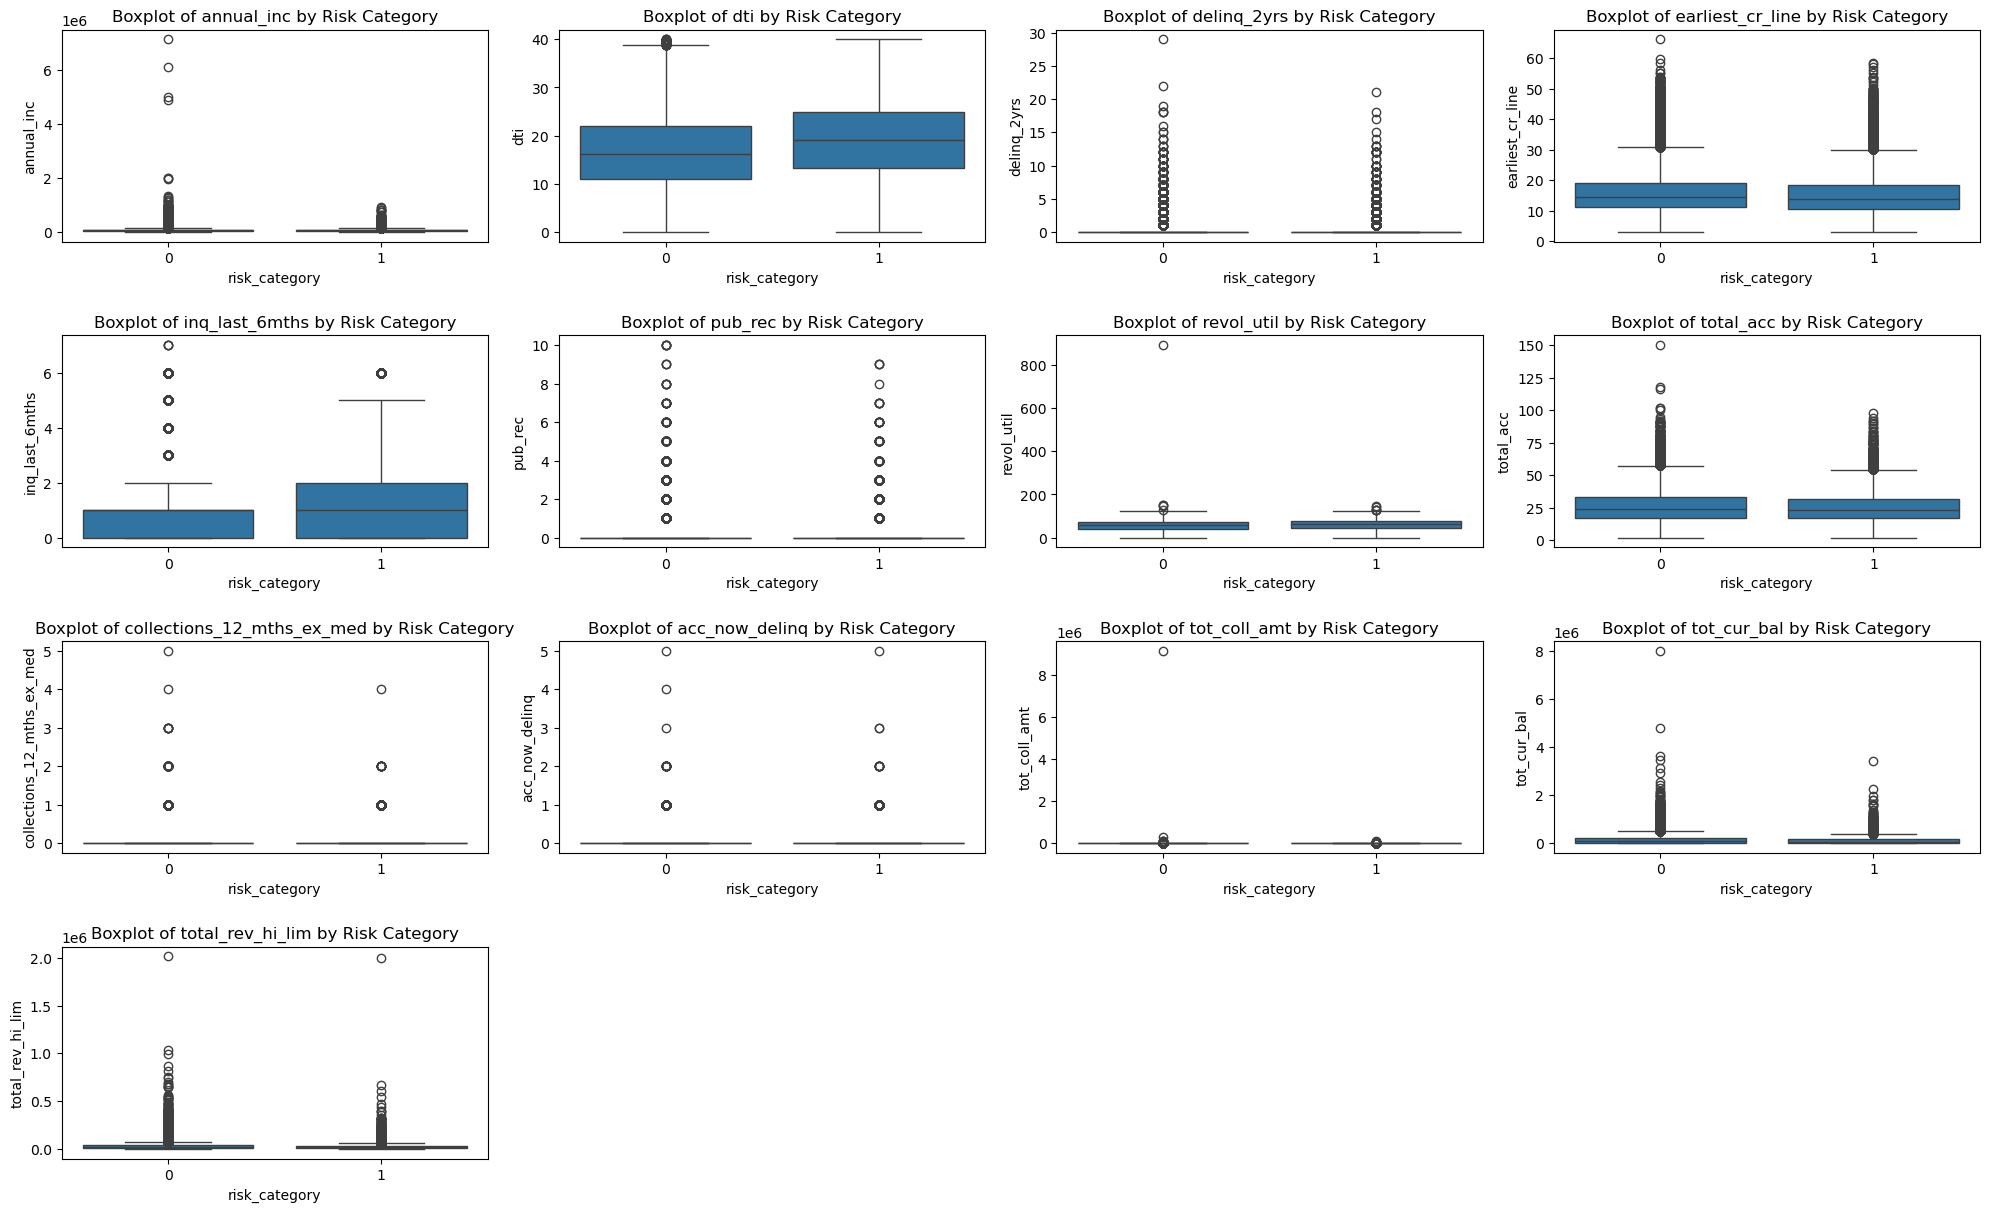

In [465]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=df_cleaned, y=col, x='risk_category')
    plt.title(f'Boxplot of {col} by Risk Category')

plt.tight_layout()
plt.show()

There's seems to be outliers with value above the third quartile. However, after deeper analysis, there seems to be no outliers caused by error in data collection. Therefore, we will keep the data as it is, and due outliers removal later in the machine learning model evalauation.

### Summary of EDA

- Based on the result of the previous ANOVA test, the 'open_acc' and 'revol_bal' will be dropped due to the high colliniearity with other features.
- Categorical features to be removed: **1)** 'zip_code' as it has high cardinality; **2)** 'application_type' as it only has 1 categoryropd.



### Final Dataset for creating baseline  ML model

In [466]:
# Dataset for creating baseline model
df_cleaned.sample(5)

,term,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,pub_rec,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,risk_category
233492,0,10,1,32910.0,0,2,9,29.76,0.0,17.0,0.0,0.0,31.5,12.0,0,0.0,0.0,0.0,82774.0,17700.0,0
451146,0,10,1,62000.0,1,2,4,23.95,0.0,27.9,0.0,1.0,59.6,38.0,0,0.0,0.0,0.0,72939.0,18700.0,0
429263,0,10,5,53000.0,0,1,35,26.01,0.0,13.4,0.0,0.0,45.6,33.0,0,0.0,0.0,0.0,26253.0,41100.0,0
371131,0,1,5,150000.0,1,1,2,13.17,0.0,13.9,0.0,1.0,46.3,18.0,1,0.0,0.0,0.0,65472.0,12800.0,0
92666,0,0,1,100000.0,1,2,4,11.98,0.0,11.7,2.0,0.0,91.6,19.0,0,0.0,0.0,0.0,347177.0,42600.0,0


In [467]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163798 entries, 42538 to 466283
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   term                        163798 non-null  int64  
 1   emp_length                  163798 non-null  int64  
 2   home_ownership              163798 non-null  int32  
 3   annual_inc                  163798 non-null  float64
 4   verification_status         163798 non-null  int64  
 5   purpose                     163798 non-null  int32  
 6   addr_state                  163798 non-null  int32  
 7   dti                         163798 non-null  float64
 8   delinq_2yrs                 163798 non-null  float64
 9   earliest_cr_line            163798 non-null  float64
 10  inq_last_6mths              163798 non-null  float64
 11  pub_rec                     163798 non-null  float64
 12  revol_util                  163798 non-null  float64
 13  total_acc      

## Machine learning modeling & Evaluation

### Check data imbalance

In [468]:
# Define features and target
X = df_cleaned.drop('risk_category', axis=1)
y = df_cleaned['risk_category']

# Check for class distribution in both counts and percentages
class_distribution = y.value_counts()
class_percentage = y.value_counts(normalize=True) * 100

print("Class distribution (counts):\n", class_distribution)
print("\nClass distribution (percentages):\n", class_percentage)

Class distribution (counts):
 risk_category
0    126115
1     37683
Name: count, dtype: int64

Class distribution (percentages):
 risk_category
0    76.994225
1    23.005775
Name: proportion, dtype: float64


The dataset can be considered mildly imbalance. 

Split the dataset into training and test sets first, and then balance the dataset using SMOTE

In [469]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [470]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

### Train baseline models with cross-validation technique applied

#### Logistic Regression

##### Train the model utilizing cross-validation method

In [471]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Cross-validation to check for overfitting/underfitting
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(log_reg, X_train_balanced, y_train_balanced, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.63094059 0.62830763 0.62793634 0.631278   0.62947103]
Mean Cross-Validation Score: 0.6295867177871033


##### Hyperparameter optimization

In [472]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2'],
}

# Set up GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.6295867177871033


##### Test the baseline model

              precision    recall  f1-score   support

           0       0.84      0.64      0.73     25117
           1       0.34      0.60      0.43      7643

    accuracy                           0.63     32760
   macro avg       0.59      0.62      0.58     32760
weighted avg       0.72      0.63      0.66     32760



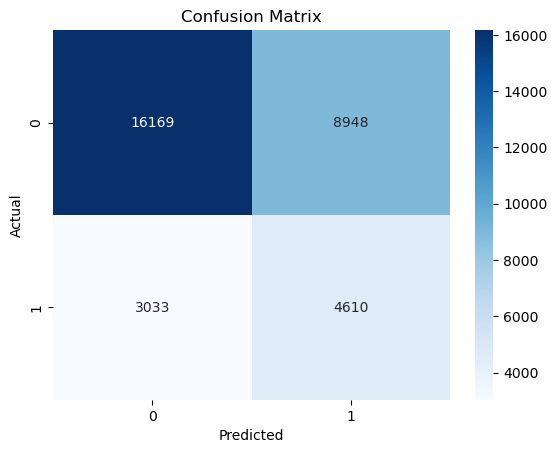

Accuracy: 0.6342796092796092
ROC AUC Score: 0.6686979644149327


In [473]:
# Train the model with the best parameters
best_log_reg = grid_search.best_estimator_

# Predict on test data
y_pred = best_log_reg.predict(X_test_scaled)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# ROC AUC score
y_pred_proba = best_log_reg.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

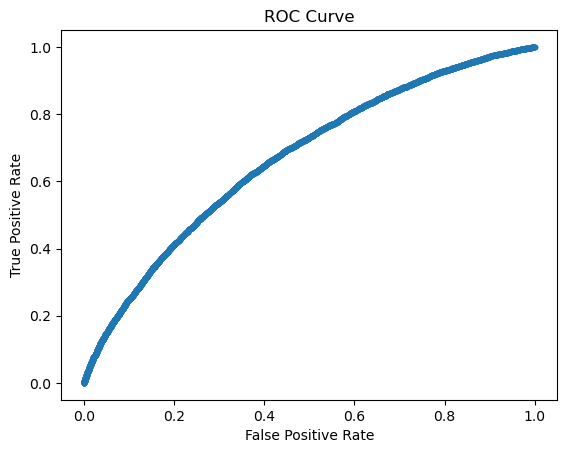

In [474]:
# Plot ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_prob = grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

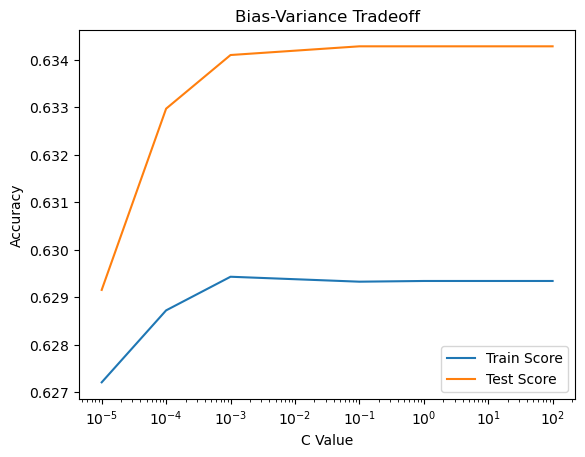

In [475]:
train_scores = []
test_scores = []
C_values = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100]

for c in C_values:
    log_reg = LogisticRegression(C=c, max_iter=1000, random_state=42)
    log_reg.fit(X_train_balanced, y_train_balanced)
    
    train_scores.append(log_reg.score(X_train_balanced, y_train_balanced))
    test_scores.append(log_reg.score(X_test_scaled, y_test))

plt.plot(C_values, train_scores, label='Train Score')
plt.plot(C_values, test_scores, label='Test Score')
plt.xscale('log')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()

#### Model Improvement (Logistic Regression)

Try to drop values above third quartile or under third quartile of the numerical feature distribution

In [476]:
# Function to drop outliers from specified columns
def drop_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1

    # Define the bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame for the specified columns only
    df_filtered = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]
    return df_filtered

In [477]:
# Columns to apply outlier removal
numerical_columns = ['annual_inc', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
                     'pub_rec', 'revol_util', 'total_acc', 
                     'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 
                     'tot_cur_bal', 'total_rev_hi_lim']

# Apply the function to your DataFrame
df_cleaned_or = drop_outliers(df_cleaned, numerical_columns)

Split the dataset into training and test sets first, and then balance the dataset using SMOTE

In [478]:
# Define features and target
X = df_cleaned_or.drop('risk_category', axis=1)
y = df_cleaned_or['risk_category']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [479]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

##### Train the model utilizing cross-validation method

In [480]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Cross-validation to check for overfitting/underfitting
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(log_reg, X_train_balanced, y_train_balanced, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.63028515 0.62451448 0.63513447 0.62967698 0.63665864]
Mean Cross-Validation Score: 0.6312539428177157


##### Hyperparameter optimization

In [481]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2'],
}

# Set up GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.6312539428177157


##### Test the improved model

              precision    recall  f1-score   support

           0       0.85      0.64      0.73     12794
           1       0.34      0.61      0.43      3759

    accuracy                           0.64     16553
   macro avg       0.59      0.63      0.58     16553
weighted avg       0.73      0.64      0.66     16553



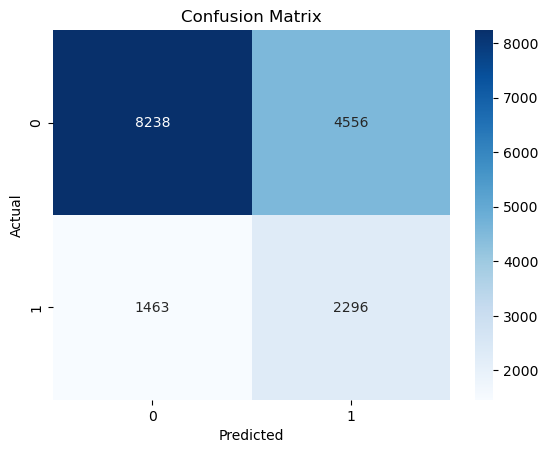

Accuracy: 0.6363801123663384
ROC AUC Score: 0.6757634004999434


In [482]:
# Train the model with the best parameters
best_log_reg = grid_search.best_estimator_

# Predict on test data
y_pred = best_log_reg.predict(X_test_scaled)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# ROC AUC score
y_pred_proba = best_log_reg.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

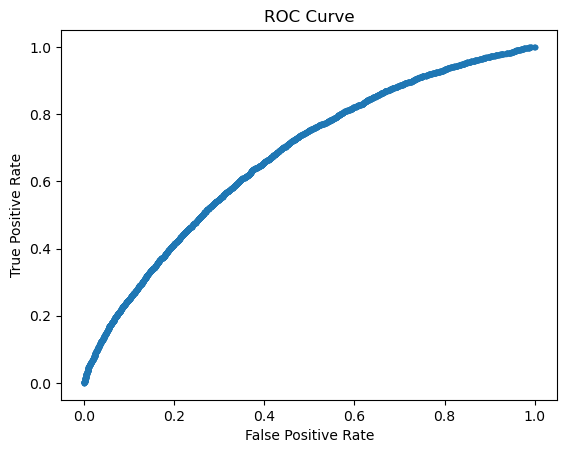

In [483]:
# Plot ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_prob = grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

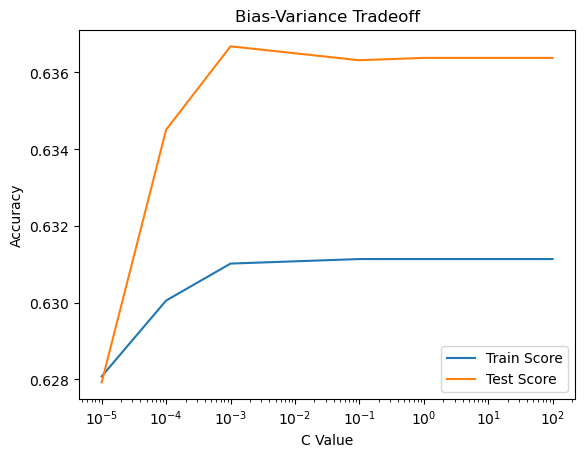

In [484]:
train_scores = []
test_scores = []
C_values = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100]

for c in C_values:
    log_reg = LogisticRegression(C=c, max_iter=1000, random_state=42)
    log_reg.fit(X_train_balanced, y_train_balanced)
    
    train_scores.append(log_reg.score(X_train_balanced, y_train_balanced))
    test_scores.append(log_reg.score(X_test_scaled, y_test))

plt.plot(C_values, train_scores, label='Train Score')
plt.plot(C_values, test_scores, label='Test Score')
plt.xscale('log')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()

#### Random Forest

##### Train the model utilizing cross-validation method

In [357]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# K-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(rf_model, X_train_balanced, y_train_balanced, cv=cv, scoring='roc_auc')
print(f'Cross-Validation AUC Scores: {cross_val_scores}')
print(f'Mean AUC Score: {cross_val_scores.mean()}')

Cross-Validation AUC Scores: [0.92081558 0.91919405 0.91767669 0.92072646 0.91790608]
Mean AUC Score: 0.9192637710352404


In [485]:
# Train the model
rf_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_proba)}')

##### Hyperparameter optimization

In [486]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train_balanced)

print(f'Best Hyperparameters: {grid_search.best_params_}')
best_rf_model = grid_search.best_estimator_

##### Test the baseline model

              precision    recall  f1-score   support

           0       0.81      0.56      0.66     25117
           1       0.28      0.56      0.37      7643

    accuracy                           0.56     32760
   macro avg       0.54      0.56      0.52     32760
weighted avg       0.68      0.56      0.60     32760



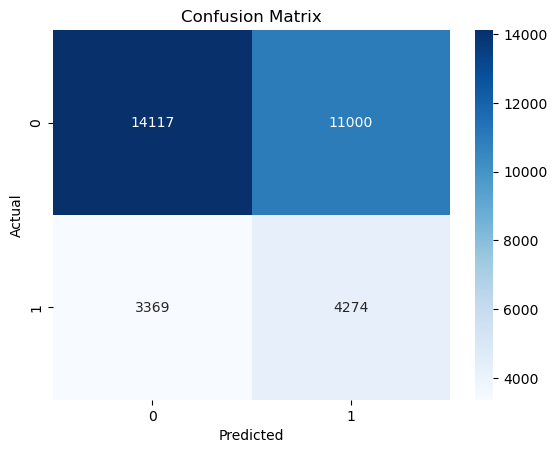

Accuracy: 0.5613858363858364
ROC AUC Score: 0.5825458377754298


In [111]:
# Train the model with the best parameters
best_log_reg = grid_search.best_estimator_

# Predict on test data
y_pred = best_log_reg.predict(X_test_scaled)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# ROC AUC score
y_pred_proba = best_log_reg.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)